In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [4]:
display(stud.head(10))
stud.info() 
# загрузили и посмотрели, какие данные есть. 395 строчек, много случайных пропусков

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [57]:
stud.isna().sum() #посчитаем сколько пропусков в каких столбцах

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [59]:
students = stud.dropna(subset=['score'], axis = 0)
students.info()
# выкинем строчки с пропусками в целевой переменной
students.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

school                  0
sex                     0
age                     0
address                15
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 38
paid                   39
activities             14
nursery                15
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime                9
goout                   7
health                 15
absences               11
score                   0
dtype: int64

2
GP    349
MS     46
Name: school, dtype: int64


<AxesSubplot:>

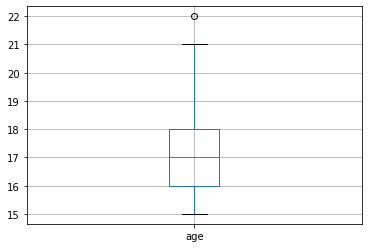

In [61]:
# начнем со столбца school

print(stud.school.nunique())
print(stud.school.value_counts())

stud.boxplot(column='age')

In [8]:
print(stud.Fjob.value_counts())

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


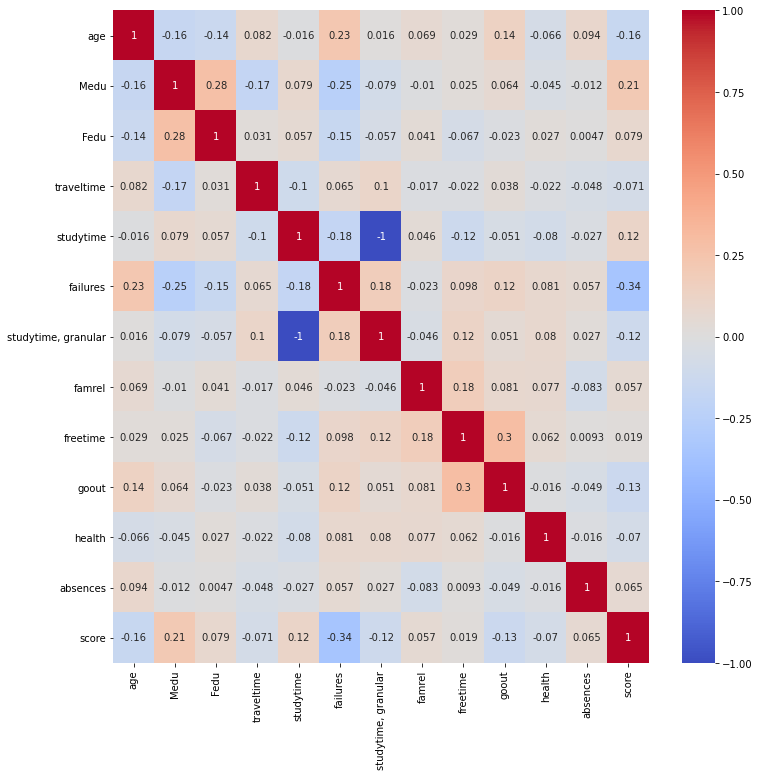

In [10]:
plt.gcf().set_size_inches(12, 12)
correlation = stud.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
display(correlation)

In [12]:
print(stud.address.value_counts())

U    295
R     83
Name: address, dtype: int64


In [14]:
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,261
LE3,107


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


<AxesSubplot:>

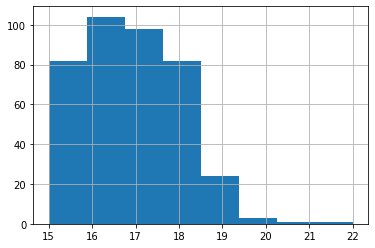

In [66]:
print(stud.age.value_counts())
stud.age.hist(bins=8)


<AxesSubplot:>

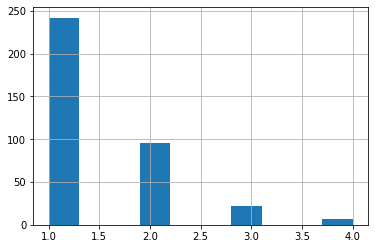

In [16]:
stud.traveltime.hist()

<AxesSubplot:>

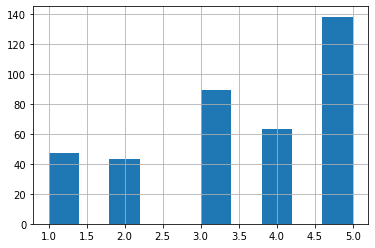

In [17]:
stud.health.hist()

<AxesSubplot:>

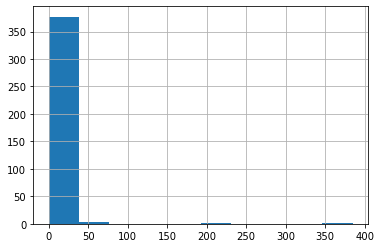

In [19]:
stud.absences.hist()

<AxesSubplot:>

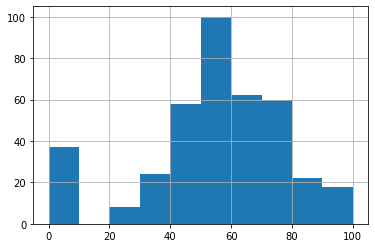

In [20]:
stud.score.hist()

<AxesSubplot:>

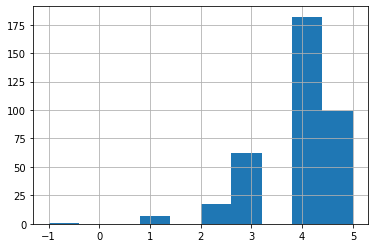

In [21]:
stud.famrel.hist()

<AxesSubplot:>

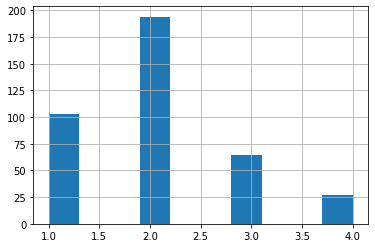

In [23]:
stud.studytime.hist()

<AxesSubplot:>

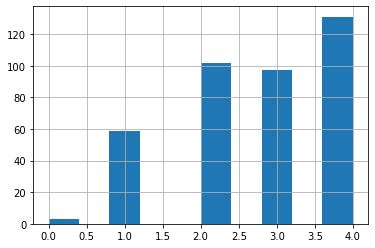

In [24]:
stud.Medu.hist()

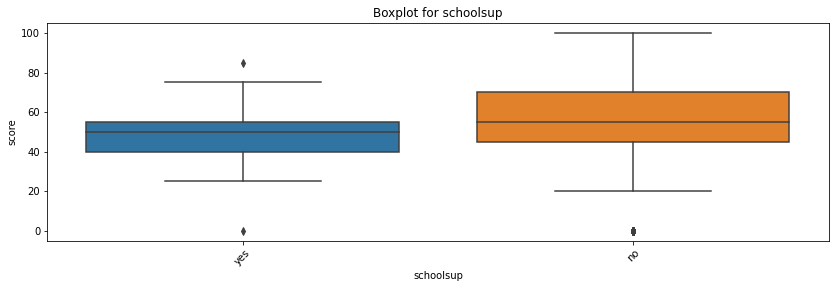

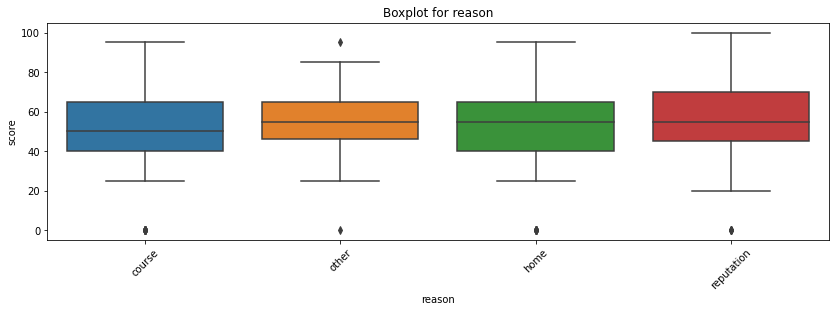

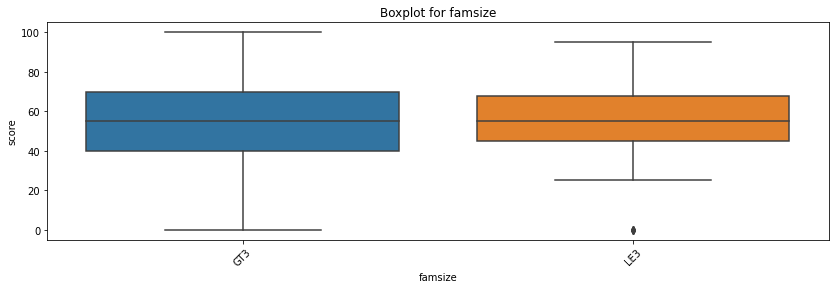

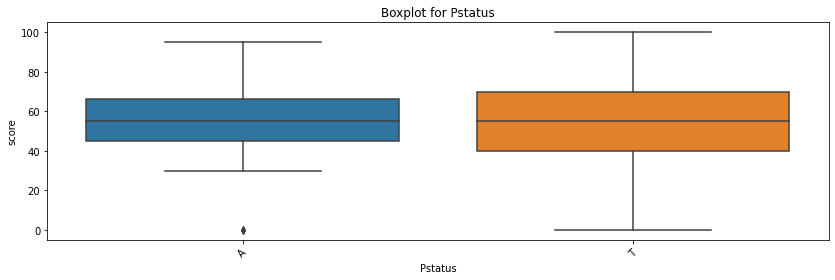

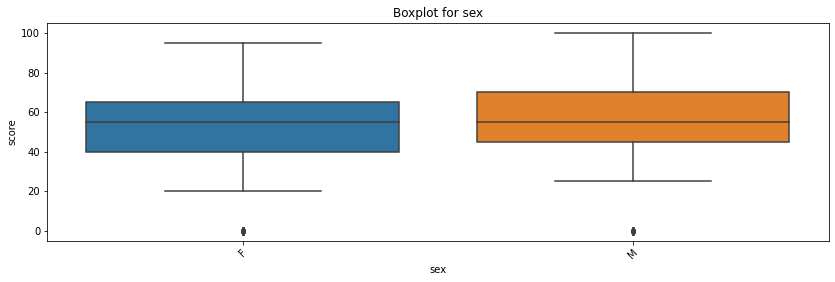

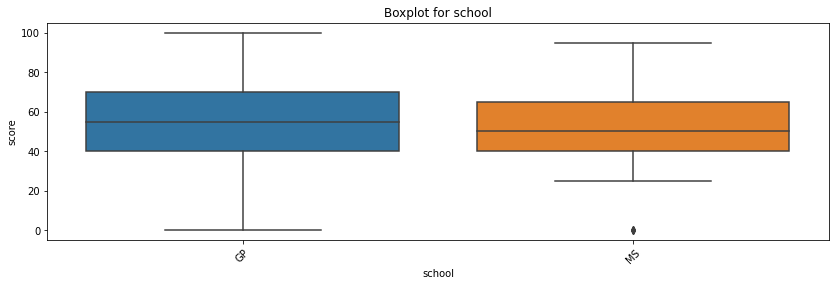

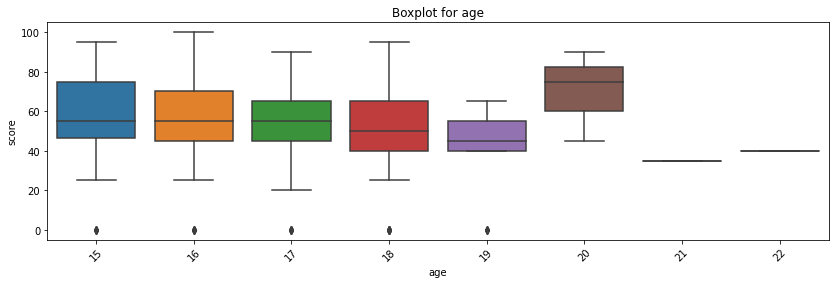

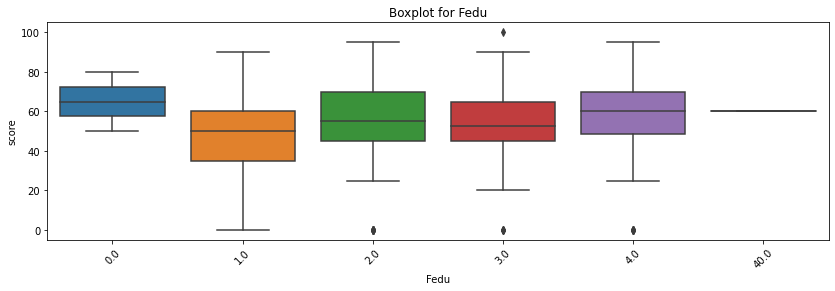

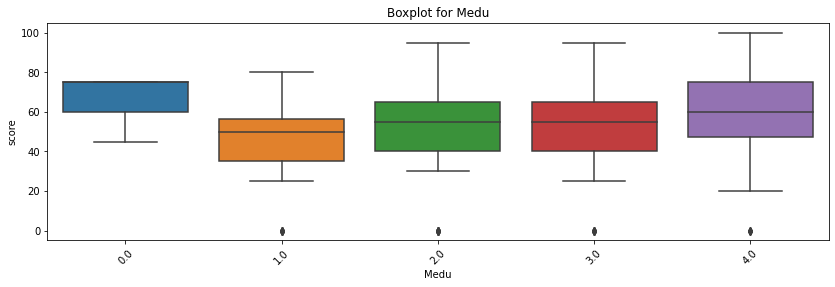

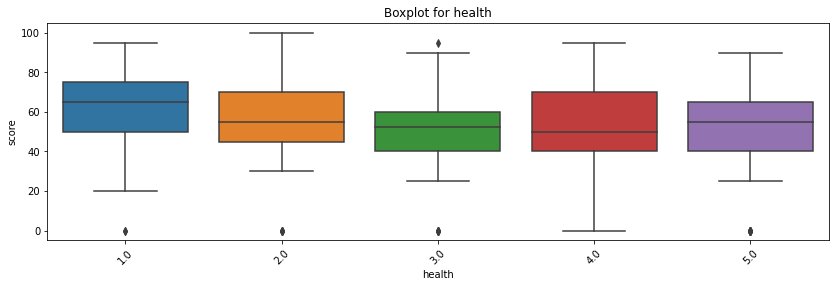

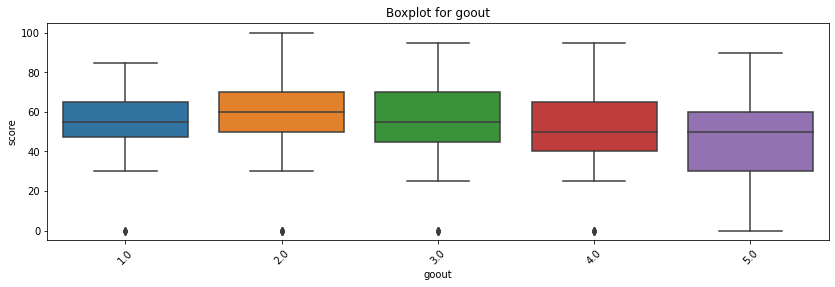

In [69]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['schoolsup', 'reason', 'famsize', 'Pstatus','sex', 'school','age', 'Fedu', 'Medu', 'health', 'goout']:
    get_boxplot(col)

In [35]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    print (cols)
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['sex', 'famsize', 'Pstatus', 'Mjob']:
    get_stat_dif(col)



Index(['F', 'M'], dtype='object')
Index(['GT3', 'LE3'], dtype='object')
Index(['T', 'A'], dtype='object')
Index(['other', 'services', 'at_home', 'teacher', 'health'], dtype='object')
Найдены статистически значимые различия для колонки Mjob


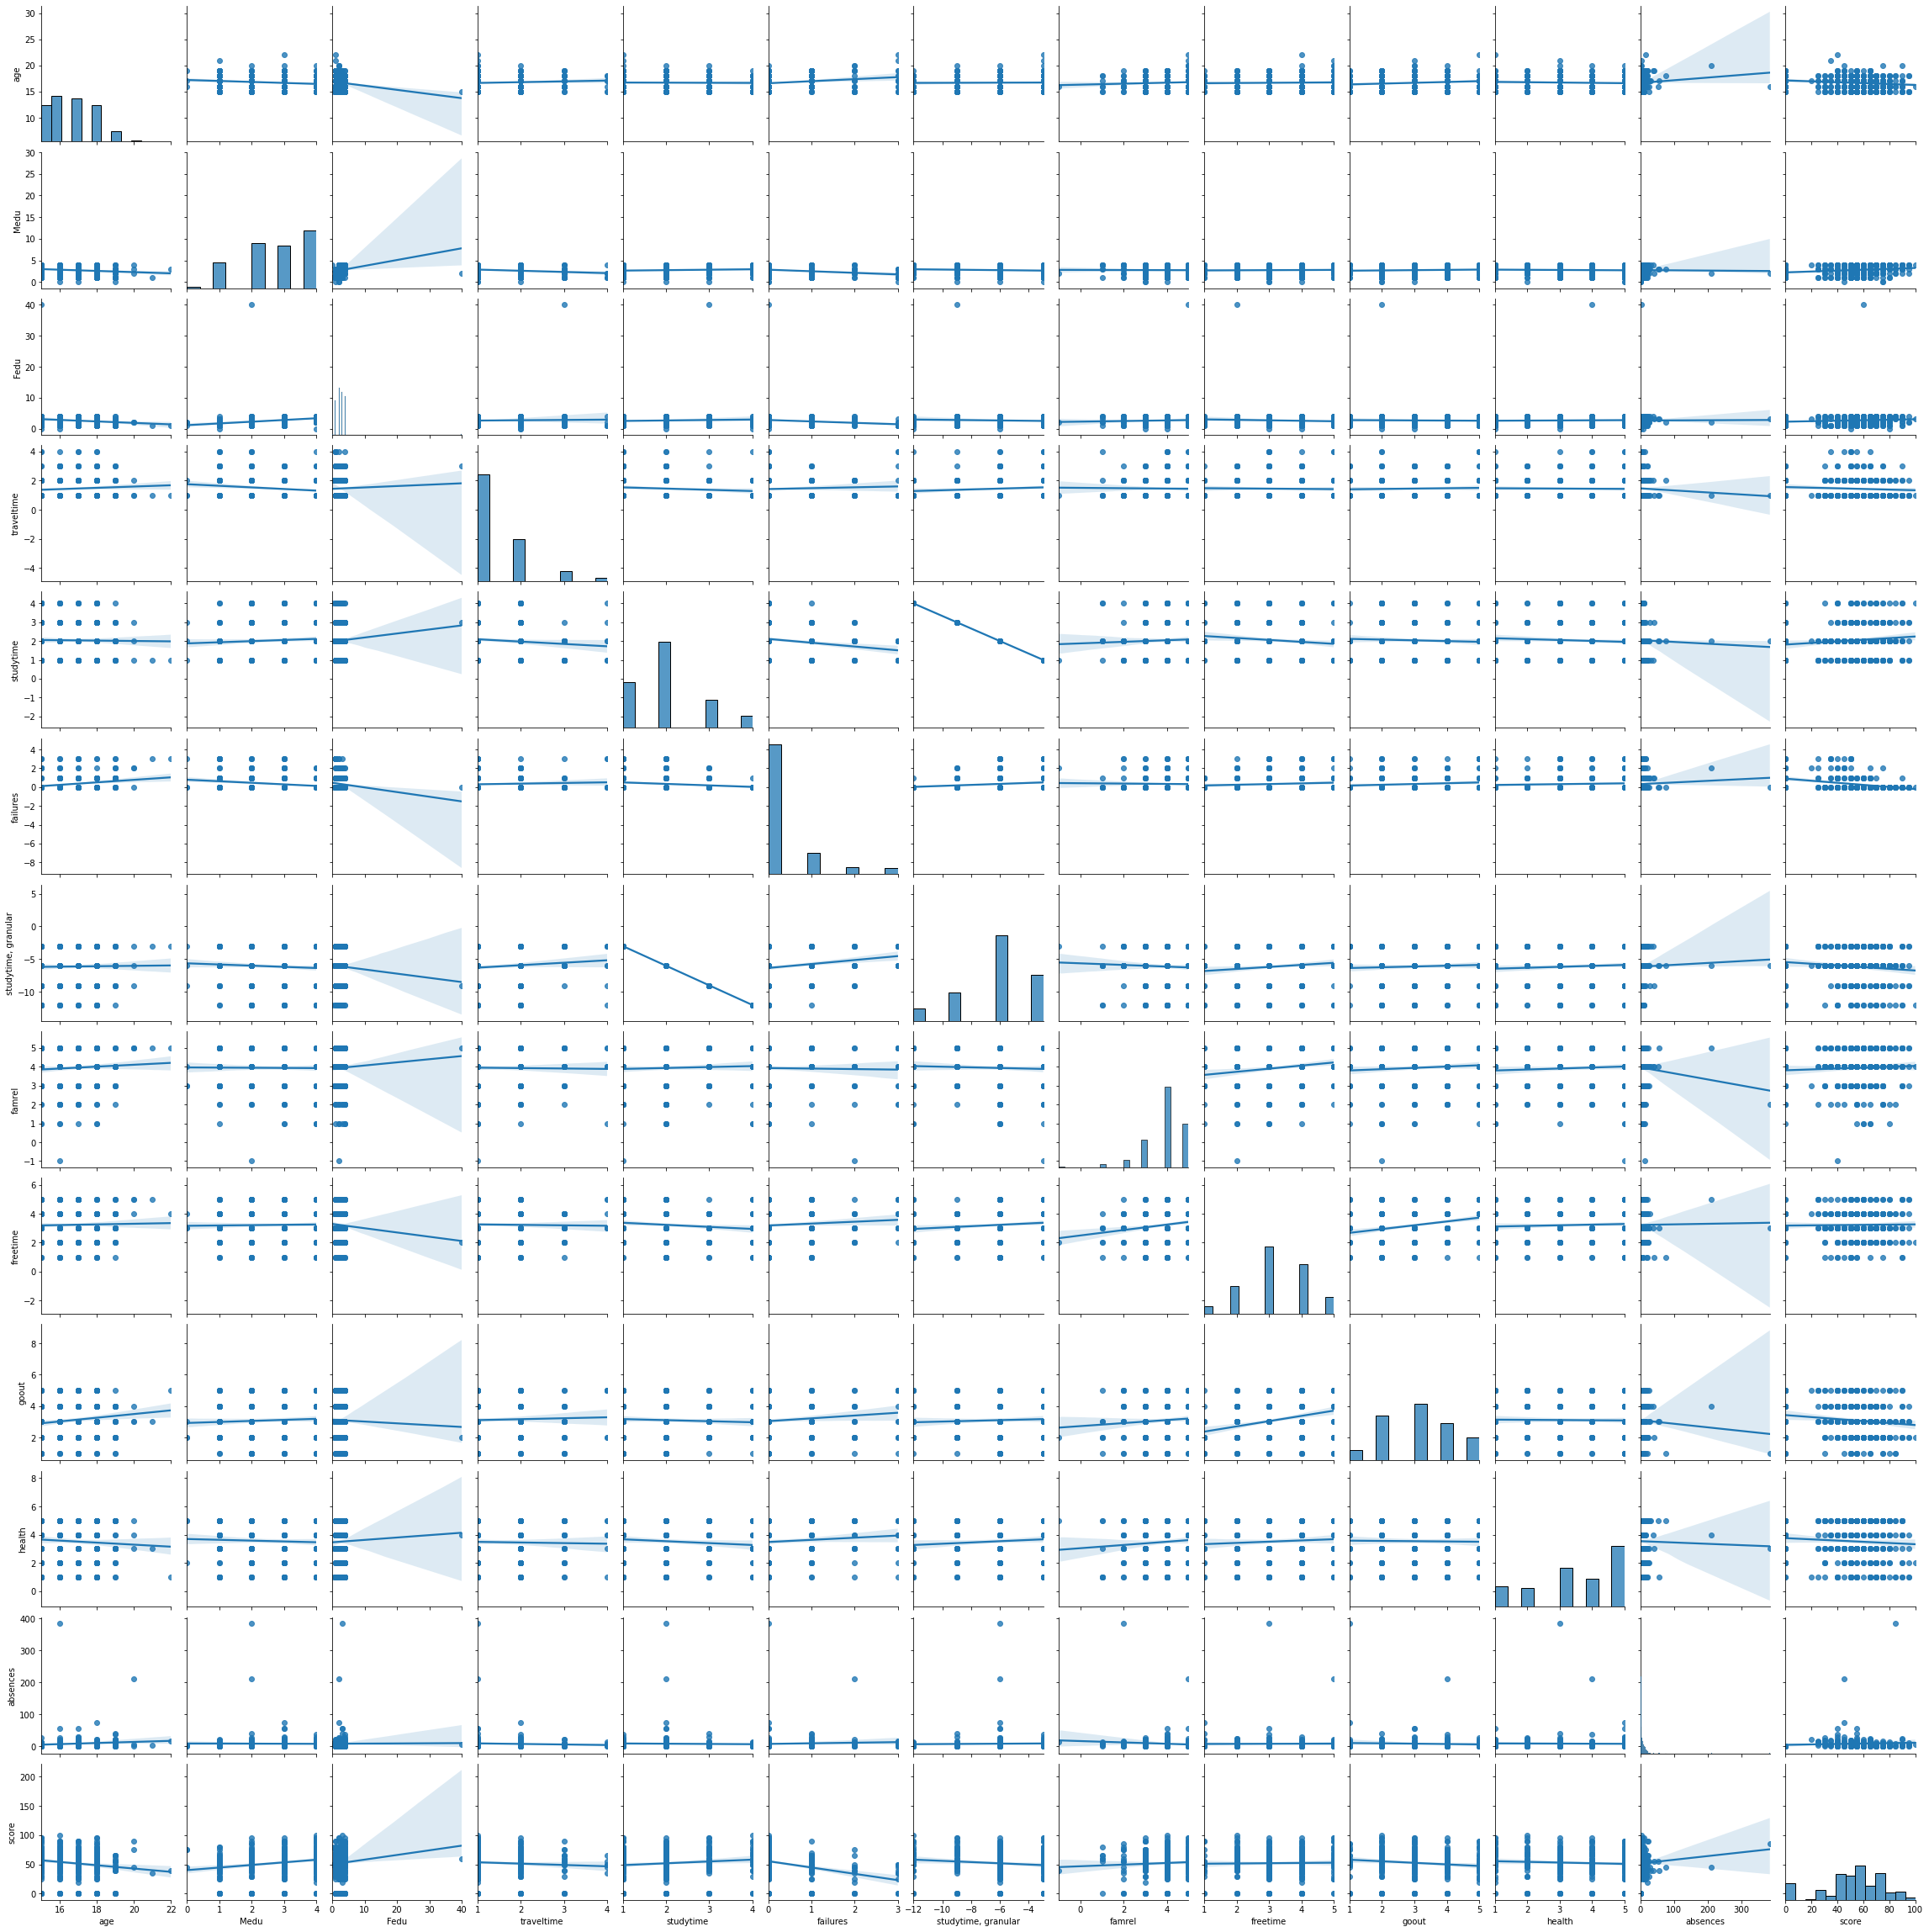

In [28]:
sns.pairplot(stud, kind = 'reg')

In [47]:
students = stud.dropna(subset=['score'], axis = 0)
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [37]:
pd.DataFrame(stud.address.value_counts())

,address
U,295
R,83


In [41]:
stud.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [48]:
students = students.dropna(subset=['address'], axis = 0)
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               374 non-null    object 
 1   sex                  374 non-null    object 
 2   age                  374 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              348 non-null    object 
 5   Pstatus              330 non-null    object 
 6   Medu                 372 non-null    float64
 7   Fedu                 351 non-null    float64
 8   Mjob                 355 non-null    object 
 9   Fjob                 339 non-null    object 
 10  reason               357 non-null    object 
 11  guardian             344 non-null    object 
 12  traveltime           349 non-null    float64
 13  studytime            367 non-null    float64
 14  failures             352 non-null    float64
 15  schoolsup            365 non-null    obj

In [49]:
students = students.dropna(subset=['paid'], axis = 0)
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               336 non-null    object 
 1   sex                  336 non-null    object 
 2   age                  336 non-null    int64  
 3   address              336 non-null    object 
 4   famsize              312 non-null    object 
 5   Pstatus              294 non-null    object 
 6   Medu                 334 non-null    float64
 7   Fedu                 316 non-null    float64
 8   Mjob                 318 non-null    object 
 9   Fjob                 307 non-null    object 
 10  reason               320 non-null    object 
 11  guardian             310 non-null    object 
 12  traveltime           315 non-null    float64
 13  studytime            329 non-null    float64
 14  failures             319 non-null    float64
 15  schoolsup            327 non-null    obj

In [73]:
stud['famsup'].isna().sum()

39

<AxesSubplot:>

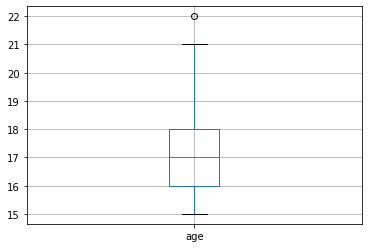

In [74]:
stud.boxplot(column='age')

<AxesSubplot:>

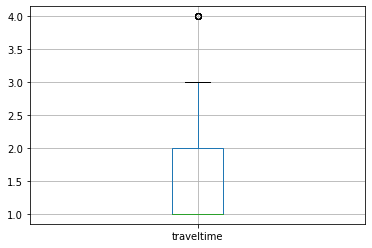

In [75]:
stud.boxplot(column='traveltime')

In [77]:
stud.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [78]:
stud.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

<AxesSubplot:>

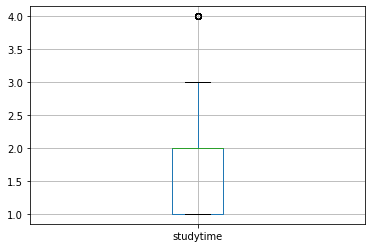

In [79]:
stud.boxplot(column='studytime')

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

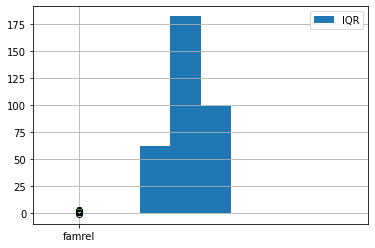

In [94]:
stud.boxplot(column='famrel')
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.famrel.loc[stud.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

stud.famrel.value_counts()

<AxesSubplot:>

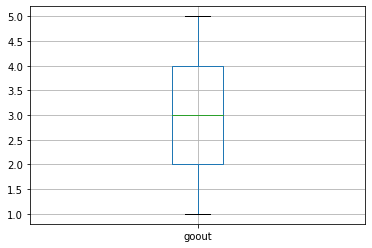

In [82]:
stud.boxplot(column='goout')

<AxesSubplot:>

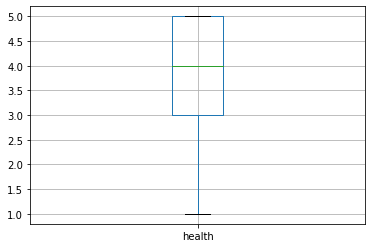

In [83]:
stud.boxplot(column='health')

<AxesSubplot:>

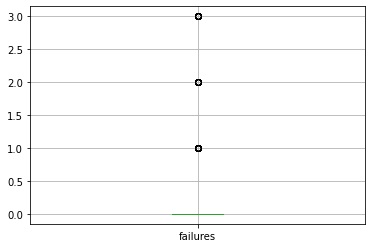

In [84]:
stud.boxplot(column='failures')

In [85]:
stud.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

<AxesSubplot:>

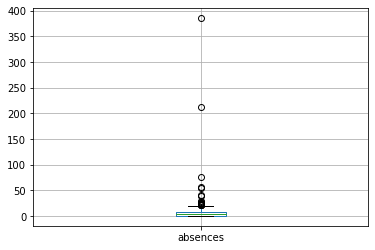

In [86]:
stud.boxplot(column='absences')

In [87]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

<AxesSubplot:title={'center':'Score Vs Пропущенные часы'}, xlabel='absences', ylabel='score'>

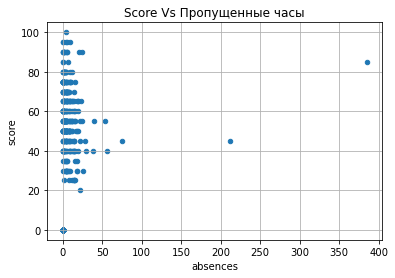

In [88]:
stud.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True, 
        title = 'Score Vs Пропущенные часы')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


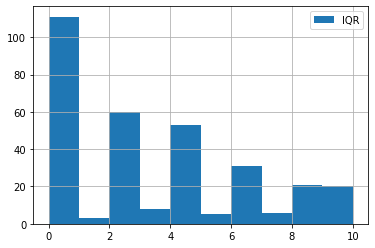

In [103]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [115]:
import numpy as np
import math

missing = stud.isna()
students2 = stud


for column in missing:
    for idx, value in missing[column].iteritems():
        if value :
            print (column, idx, value)
            students2 = students2.dropna(subset=[column], axis = 0)
            break
        else:
            pass
students2.info()
students2.isna().sum()
students2.head(10)


        

address 6 True
famsize 0 True
Pstatus 1 True
Medu 92 True
Fedu 21 True
Mjob 29 True
Fjob 3 True
reason 33 True
guardian 38 True
traveltime 26 True
studytime 17 True
failures 21 True
schoolsup 27 True
famsup 17 True
paid 2 True
activities 43 True
nursery 22 True
studytime, granular 17 True
higher 34 True
internet 0 True
romantic 2 True
famrel 8 True
freetime 32 True
goout 89 True
health 30 True
absences 24 True
score 201 True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               97 non-null     object 
 1   sex                  97 non-null     object 
 2   age                  97 non-null     int64  
 3   address              97 non-null     object 
 4   famsize              97 non-null     object 
 5   Pstatus              97 non-null     object 
 6   Medu                 97 non-null     float64
 7   Fedu        

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
16,GP,F,16,U,GT3,T,4.0,4.0,services,services,reputation,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,2.0,3.0,2.0,6.0,70.0
23,GP,M,16,U,LE3,T,2.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,5.0,0.0,60.0
39,GP,F,15,R,GT3,T,2.0,2.0,at_home,other,reputation,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,-3.0,yes,no,no,4.0,3.0,1.0,2.0,8.0,65.0
45,GP,F,15,U,LE3,A,4.0,3.0,other,other,course,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,yes,5.0,2.0,2.0,5.0,8.0,30.0
50,GP,F,16,U,LE3,T,2.0,2.0,services,services,course,mother,3.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,3.0,4.0,2.0,65.0


In [109]:
stud.isna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [116]:
stud.notna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
1,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
391,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
392,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True
393,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
